# Week 5 Problem Set

## Hudson Arney

In [120]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score

### Part 1

In [121]:
iris = sklearn.datasets.load_iris()
X = iris.data[:,:2]
y = iris.target
dir(iris)
print(f"X shape: {X.shape}")

X shape: (150, 2)


In [122]:
cls = np.unique(y)
print(f"{cls=}")

cls=array([0, 1, 2])


[4.3 7.9]


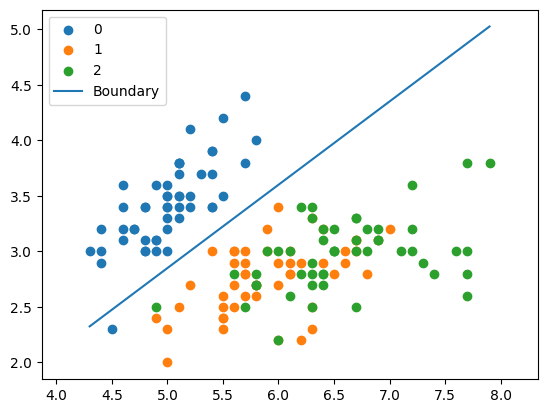

In [123]:
for c in cls:
    plt.scatter(X[y==c,0], X[y==c,1], label=c)
xr = np.array([np.min(X[:,0]), np.max(X[:,0])])    
print(xr)
yb = 0.75*xr - 0.9
plt.plot(xr, yb, label="Boundary")
plt.gca().axis('equal')
plt.legend()
plt.show()

In [124]:
A = np.array([[3/4, -1],[-4/3, -1]])
nb = -(X[:,1] + 4/3*X[:,0])
print(nb[:5])

[-10.3         -9.53333333  -9.46666667  -9.23333333 -10.26666667]


In [125]:
b = np.vstack((np.ones((1,nb.size)) * 0.9,nb))
print(f"{b.shape=}")
print(b[:,:5])

b.shape=(2, 150)
[[  0.9          0.9          0.9          0.9          0.9       ]
 [-10.3         -9.53333333  -9.46666667  -9.23333333 -10.26666667]]


In [126]:
x_proj = np.linalg.solve(A, b)
print(f"{x_proj.shape=}")
print(x_proj[:,:5])

x_proj.shape=(2, 150)
[[5.376 5.008 4.976 4.864 5.36 ]
 [3.132 2.856 2.832 2.748 3.12 ]]


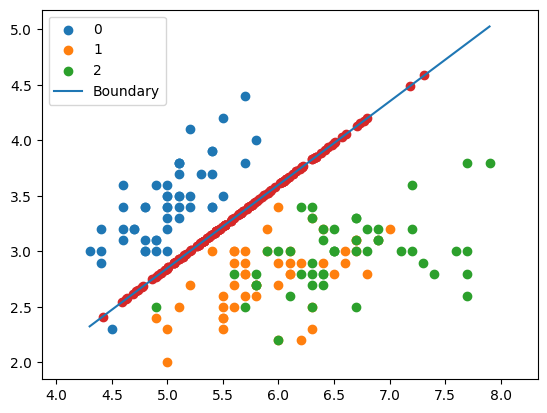

In [127]:
for c in cls:
    plt.scatter(X[y==c,0], X[y==c,1], label=c)
plt.plot(xr, yb, label="Boundary")
plt.scatter(x_proj[0,:], x_proj[1,:])
plt.gca().axis('equal')
plt.legend()
plt.show()

In [128]:
V = X - x_proj.T
print(f"{V.shape=}")
d = np.linalg.norm(V, axis=1)
print(d)

V.shape=(150, 2)
[0.46 0.18 0.46 0.44 0.6  0.6  0.68 0.44 0.4  0.26 0.44 0.56 0.24 0.54
 0.44 0.82 0.6  0.46 0.34 0.7  0.2  0.62 0.84 0.3  0.56 0.12 0.44 0.4
 0.32 0.46 0.32 0.2  0.88 0.78 0.26 0.28 0.22 0.66 0.48 0.38 0.52 0.14
 0.64 0.52 0.7  0.24 0.7  0.52 0.5  0.36 0.92 0.56 0.94 0.74 0.94 0.46
 0.42 0.3  0.92 0.24 0.68 0.42 1.12 0.62 0.32 0.82 0.24 0.6  1.24 0.64
 0.26 0.7  1.06 0.7  0.8  0.84 1.12 0.9  0.56 0.62 0.66 0.66 0.6  0.72
 0.12 0.16 0.82 1.22 0.24 0.58 0.5  0.54 0.68 0.44 0.48 0.3  0.38 0.68
 0.34 0.46 0.42 0.6  1.14 0.74 0.78 1.44 0.22 1.34 1.3  0.72 0.62 0.96
 0.96 0.7  0.52 0.56 0.78 0.86 1.82 1.12 0.86 0.4  1.66 0.9  0.66 1.04
 0.76 0.54 0.88 1.2  1.48 0.98 0.88 0.82 0.86 1.5  0.34 0.64 0.48 0.94
 0.82 0.94 0.6  0.8  0.66 0.9  1.06 0.78 0.28 0.42]


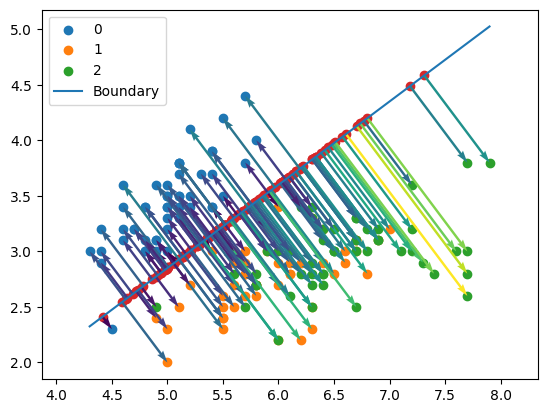

In [129]:
for c in cls:
    plt.scatter(X[y==c,0], X[y==c,1], label=c)
plt.plot(xr, yb, label="Boundary")
plt.scatter(x_proj[0,:], x_proj[1,:])
plt.quiver(x_proj[0,:], x_proj[1,:], V[:,0], V[:,1], d, angles='xy', scale_units='xy', scale=1)
plt.gca().axis('equal')
plt.legend()
plt.show()

In [130]:
sgd = sklearn.linear_model.SGDClassifier(loss="log_loss")
y2 = y.copy()
y2[y2==2] = 1
sgd.fit(X, y2)
pred_labels = sgd.predict(X)
pred_prob = sgd.predict_proba(X)

In [131]:
print(pred_labels[:5])
print(pred_prob[:5])

[0 0 0 0 0]
[[1.00000000e+000 5.72623066e-101]
 [1.00000000e+000 3.62432558e-071]
 [1.00000000e+000 5.51408881e-093]
 [1.00000000e+000 3.80990980e-089]
 [1.00000000e+000 7.06304730e-112]]


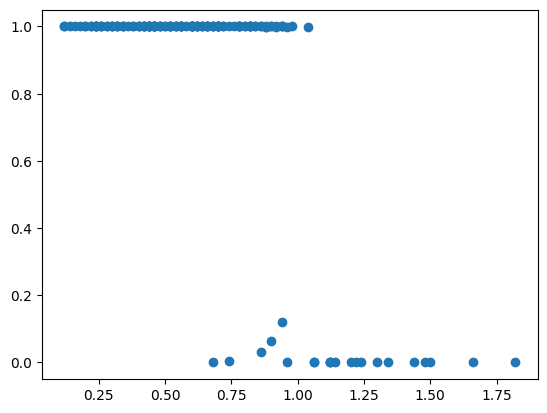

In [132]:
plt.scatter(d, pred_prob[:,0])

In [133]:
sgn = np.sign(np.dot(V, [3,4]))
d_sgn = d * sgn

In [134]:
print(d_sgn)

[ 0.46  0.18  0.46  0.44  0.6   0.6   0.68  0.44  0.4   0.26  0.44  0.56
  0.24  0.54  0.44  0.82  0.6   0.46  0.34  0.7   0.2   0.62  0.84  0.3
  0.56  0.12  0.44  0.4   0.32  0.46  0.32  0.2   0.88  0.78  0.26  0.28
  0.22  0.66  0.48  0.38  0.52 -0.14  0.64  0.52  0.7   0.24  0.7   0.52
  0.5   0.36 -0.92 -0.56 -0.94 -0.74 -0.94 -0.46 -0.42 -0.3  -0.92 -0.24
 -0.68 -0.42 -1.12 -0.62 -0.32 -0.82 -0.24 -0.6  -1.24 -0.64 -0.26 -0.7
 -1.06 -0.7  -0.8  -0.84 -1.12 -0.9  -0.56 -0.62 -0.66 -0.66 -0.6  -0.72
 -0.12 -0.16 -0.82 -1.22 -0.24 -0.58 -0.5  -0.54 -0.68 -0.44 -0.48 -0.3
 -0.38 -0.68 -0.34 -0.46 -0.42 -0.6  -1.14 -0.74 -0.78 -1.44 -0.22 -1.34
 -1.3  -0.72 -0.62 -0.96 -0.96 -0.7  -0.52 -0.56 -0.78 -0.86 -1.82 -1.12
 -0.86 -0.4  -1.66 -0.9  -0.66 -1.04 -0.76 -0.54 -0.88 -1.2  -1.48 -0.98
 -0.88 -0.82 -0.86 -1.5  -0.34 -0.64 -0.48 -0.94 -0.82 -0.94 -0.6  -0.8
 -0.66 -0.9  -1.06 -0.78 -0.28 -0.42]


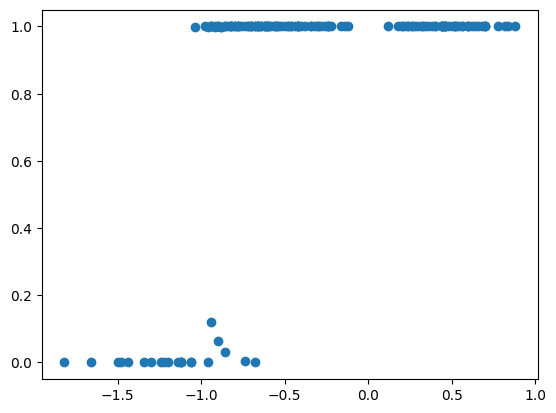

In [135]:
plt.scatter(d_sgn, pred_prob[:,0])

In [136]:
r_result = stats.pearsonr(d_sgn, pred_prob[:,0])
print(r_result)

PearsonRResult(statistic=0.5459905748185611, pvalue=4.97078983203276e-13)


### Part 2

1.

In [137]:
file_path = "C:/Users/arneyh/CSC 5601 - Theory of Machine Learning/Assignments/Week 5/Data/"
results_data = pd.read_csv(file_path + "results.csv", header=None)
results_data = results_data.rename(columns={0: 'X', 1: 'y'})
results_data.head()

,X,y
0,0.99348,1
1,0.87742,0
2,0.91694,0
3,0.99419,1
4,0.99394,1


2.

In [138]:
thresholds = [0.25, 0.5, 0.75]

In [139]:
for threshold in thresholds:
    predicted_labels = (results_data['X'] >= threshold).astype(int)
    results_data[f'predicted_label_{threshold}'] = predicted_labels


3.

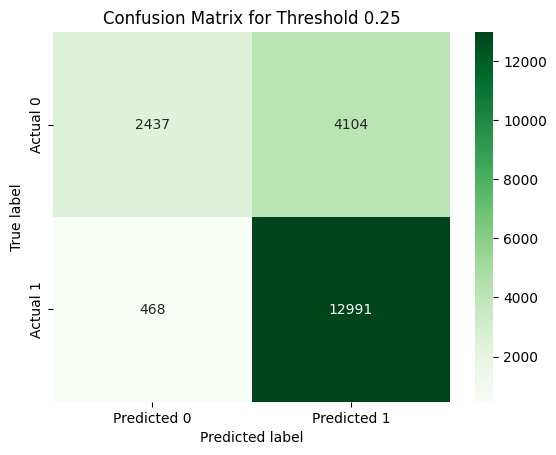

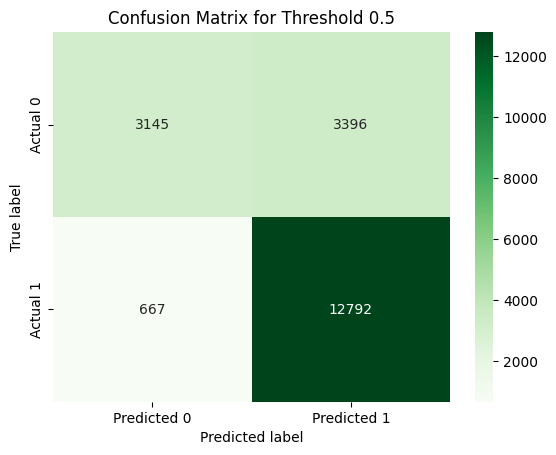

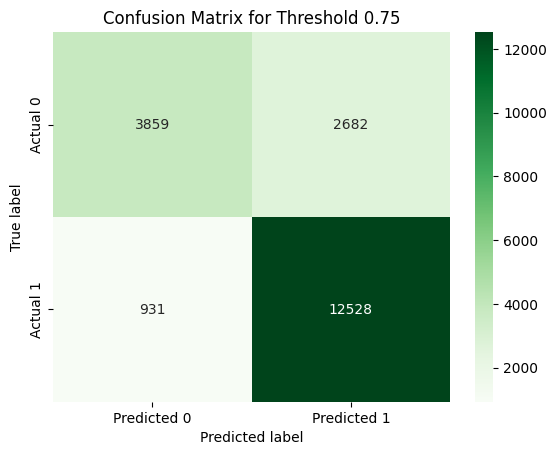

In [140]:
for threshold in thresholds:
    predicted_labels = (results_data['X'] >= threshold).astype(int)
    results_data[f'predicted_label_{threshold}'] = predicted_labels
    
    cm = confusion_matrix(results_data['y'], predicted_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
                xticklabels=['Predicted 0', 'Predicted 1'], 
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for Threshold {threshold}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

4.

In [141]:
true_positive_rates = []
false_positive_rates = []

In [142]:
for threshold in thresholds:
    predicted_labels = (results_data['X'] >= threshold).astype(int)
    results_data[f'predicted_label_{threshold}'] = predicted_labels
    
    cm = confusion_matrix(results_data['y'], predicted_labels)
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    true_positive_rates.append(tpr)
    false_positive_rates.append(fpr)

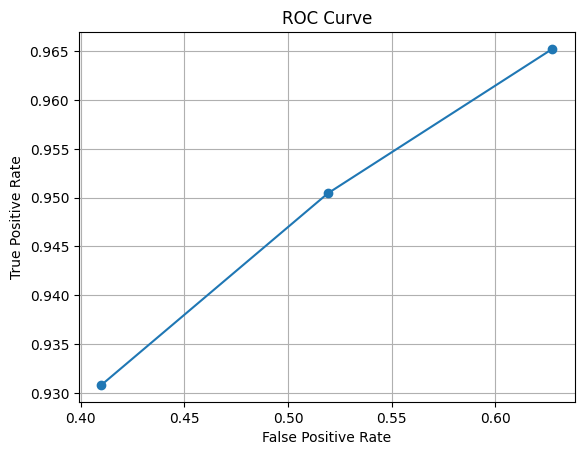

In [143]:
plt.figure()
plt.plot(false_positive_rates, true_positive_rates, marker='o')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

What do you notice about the two rates as the threshold is changed? 
- When the threshold increases the False Positive Rate Increase and the True Positive Rate Increases.

Which thresholds give the highest and lowest true positive rates? 
- The Highest True positive rate comes from the 0.75 threshold
- The Lowest True positive rate comes from the 0.25 threshold

Which thresholds give the highest and lowest false positive rates?
- The Highest false positive rate comes from the 0.75 threshold
- The Lowest false positive rate comes from the 0.25 threshold

5.

In [144]:
unique_scores = sorted(results_data['X'].unique())
unique_scores = np.sort(unique_scores)[::-1]

In [145]:
all_true_positive_rates = []
all_false_positive_rates = []

In [146]:
for threshold in unique_scores:
    predicted_labels = (results_data['X'] >= threshold).astype(int)
    cm = confusion_matrix(results_data['y'], predicted_labels)
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    all_true_positive_rates.append(tpr)
    all_false_positive_rates.append(fpr)

In [147]:
max_tpr_index = all_true_positive_rates.index(max(all_true_positive_rates))
min_tpr_index = all_true_positive_rates.index(min(all_true_positive_rates))
highest_tpr_threshold = unique_scores[max_tpr_index]
lowest_tpr_threshold = unique_scores[min_tpr_index]

max_fpr_index = all_false_positive_rates.index(max(all_false_positive_rates))
min_fpr_index = all_false_positive_rates.index(min(all_false_positive_rates))
highest_fpr_threshold = unique_scores[max_fpr_index]
lowest_fpr_threshold = unique_scores[min_fpr_index]

In [148]:
print(f"Highest True Positive Rate: {max(all_true_positive_rates):.4f} (Threshold: {highest_tpr_threshold})")
print(f"Lowest True Positive Rate: {min(all_true_positive_rates):.4f} (Threshold: {lowest_tpr_threshold})")
print(f"Highest False Positive Rate: {max(all_false_positive_rates):.4f} (Threshold: {highest_fpr_threshold})")
print(f"Lowest False Positive Rate: {min(all_false_positive_rates):.4f} (Threshold: {lowest_fpr_threshold})")

Highest True Positive Rate: 1.0000 (Threshold: 0.0020082)
Lowest True Positive Rate: 0.0001 (Threshold: 0.99716)
Highest False Positive Rate: 1.0000 (Threshold: 0.0008985)
Lowest False Positive Rate: 0.0000 (Threshold: 0.99716)


6.

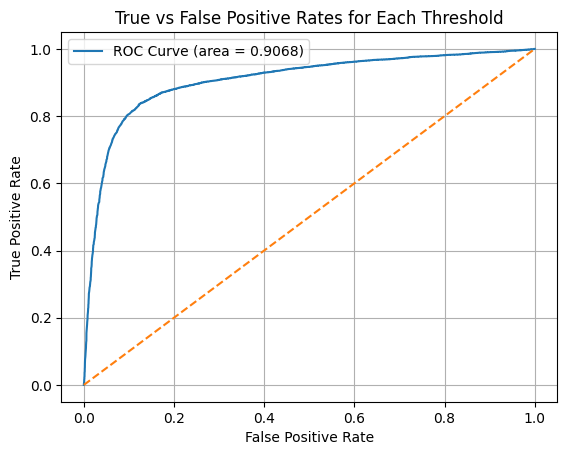

In [149]:
plt.figure()
plt.plot(all_false_positive_rates, all_true_positive_rates, label=f'ROC Curve (area = {roc_auc_score(results_data["y"], results_data["X"]):.4f})')
plt.plot([0, 1], [0, 1], '--')
plt.title('True vs False Positive Rates for Each Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()